In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# load the dataset
%run ../Jane/extract_data.py

Your data is ready! Merged table name is zillow_full.


In [3]:
# drop the columns that will not be used
zillow_full.drop(['AQIMean','PersonalIncome','Vol_moderate_income','Vol_low_income','State-County','City',
                  'Metro'],axis=1,inplace=True)
# set date index for ease
zillow_full.set_index('Date',inplace=True)

# features i have engineered:
- poverty
- (un)employment
- nightlife/entertainment
- pct college
- commute time
- move within/ move new city
- home density (pop/households)
- housing avaialbility (n_units /households)


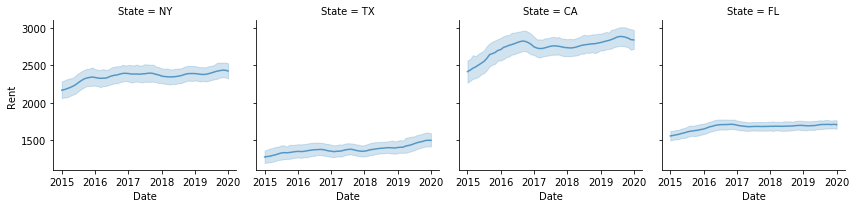

In [5]:
# rent over time in 4 areas
g = sns.FacetGrid(zillow_full.reset_index(), col="State")
g.map(sns.lineplot, "Date", "Rent", alpha=.7)

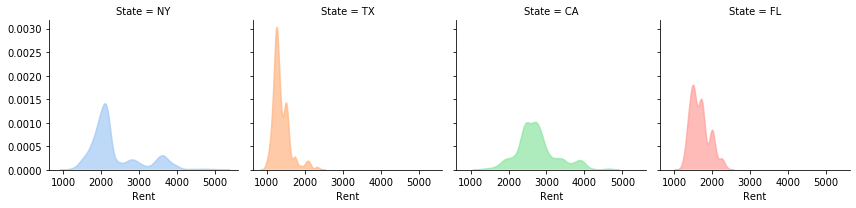

In [9]:
# density plot of the rent distribution
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "Rent", alpha=.7,shade=True)

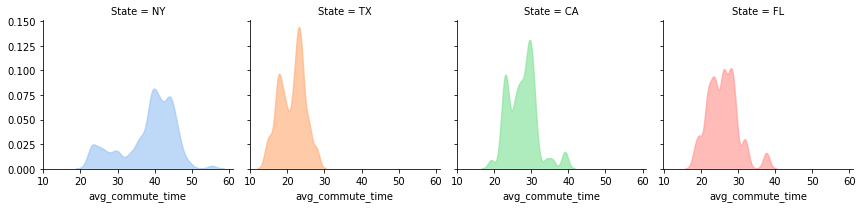

In [11]:
# density plot of the commute time distribution
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "avg_commute_time", alpha=.7,shade=True)

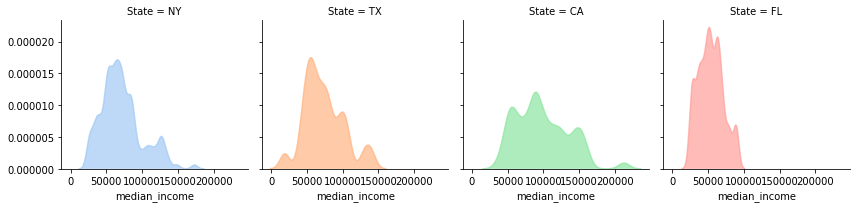

In [24]:
# density plot of the commute time distribution
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "median_income", alpha=.7,shade=True)

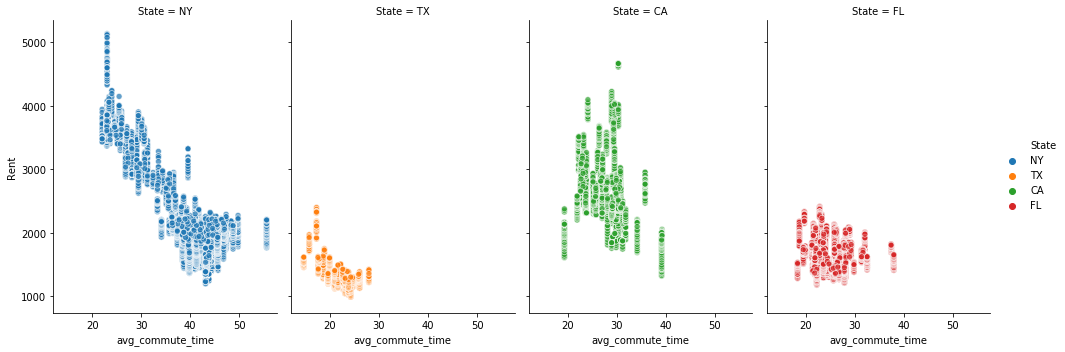

In [30]:
# scatterplot of avg commute time by rent
sns.relplot(data=zillow_full, x="avg_commute_time", y="Rent", hue="State",col="State",aspect=.7,alpha=.7)

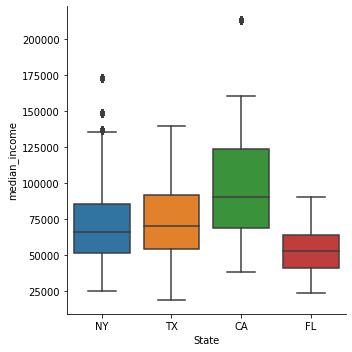

In [39]:
sns.catplot(data=zillow_full,x = 'State',y='median_income',kind="box")

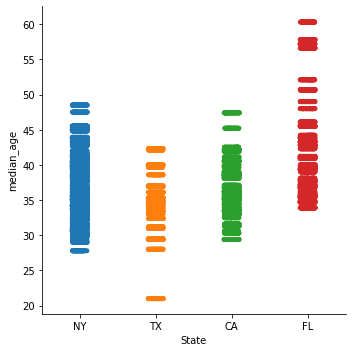

In [62]:
sns.catplot(data=zillow_full,x = 'State',y='median_age')

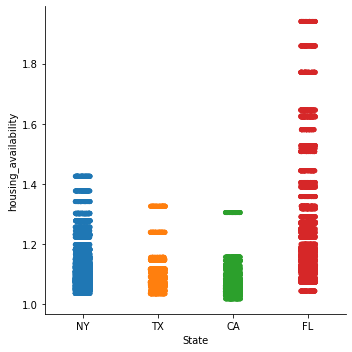

In [64]:
sns.catplot(data=zillow_full,x ='State',y='housing_availability')

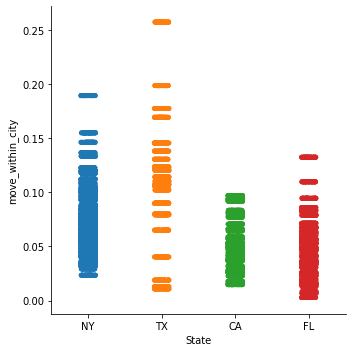

In [65]:
sns.catplot(data=zillow_full,x ='State',y='move_within_city')

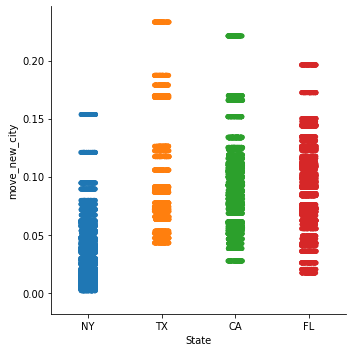

In [66]:
sns.catplot(data=zillow_full,x ='State',y='move_new_city')

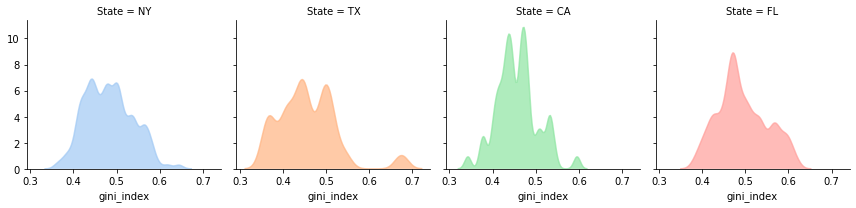

In [68]:
# density plot of the gini index
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "gini_index", alpha=.7,shade=True)

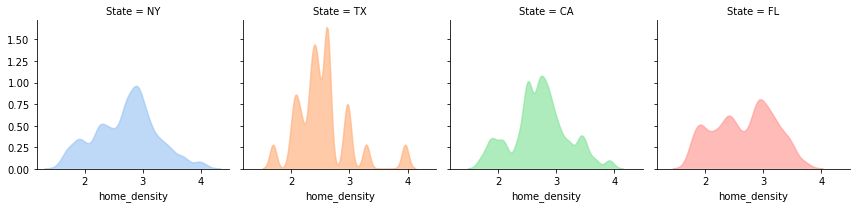

In [43]:
# density plot of the approx. household size
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "home_density", alpha=.7,shade=True)

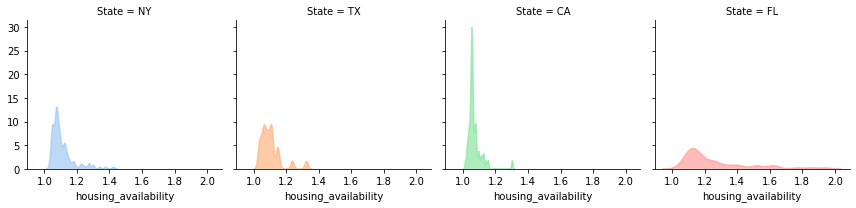

In [44]:
# density plot of the approx. housing availability
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "housing_availability", alpha=.7,shade=True)

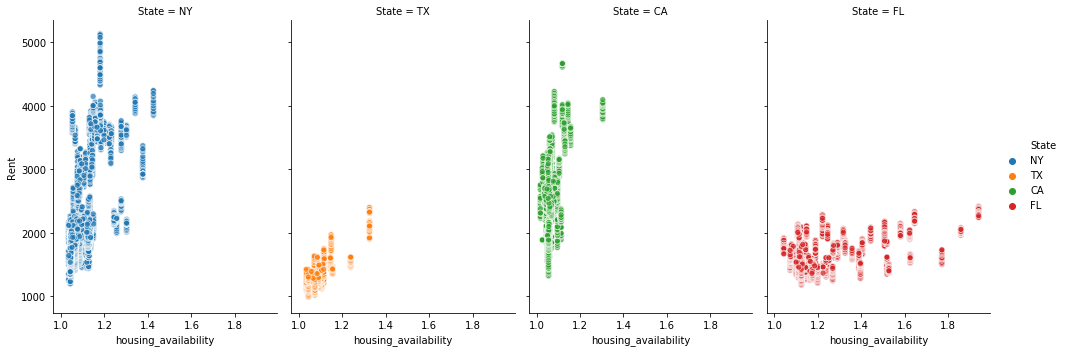

In [46]:
# scatterplot of avg commute time by rent
sns.relplot(data=zillow_full, x="housing_availability", y="Rent", hue="State",col="State",aspect=.7,alpha=.7)

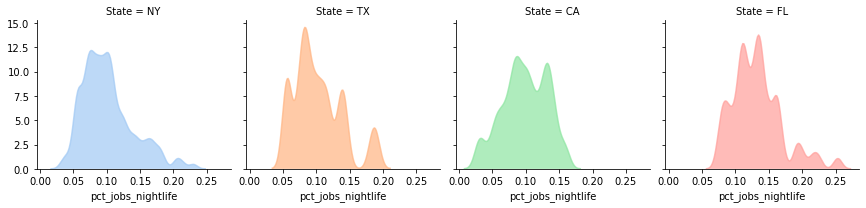

In [49]:
# density plot of the approx. housing availability
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "pct_jobs_nightlife", alpha=.7,shade=True)

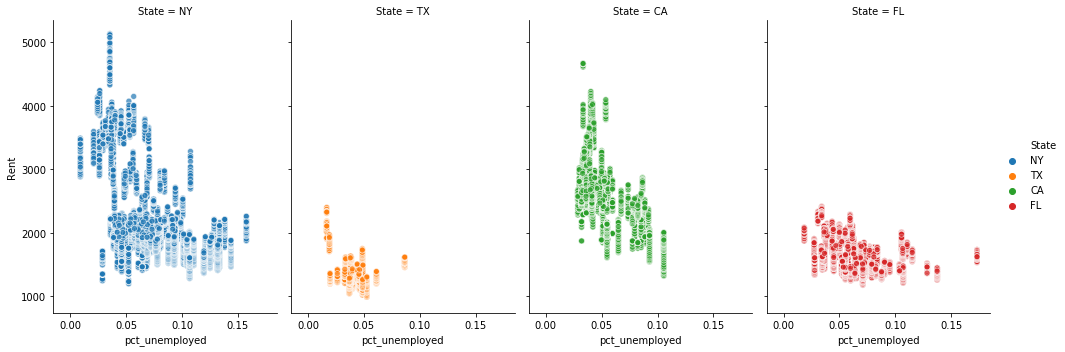

In [57]:
# scatterplot of avg commute time by rent
sns.relplot(data=zillow_full, x="pct_unemployed", y="Rent", hue="State",col="State",aspect=.7,alpha=.7)

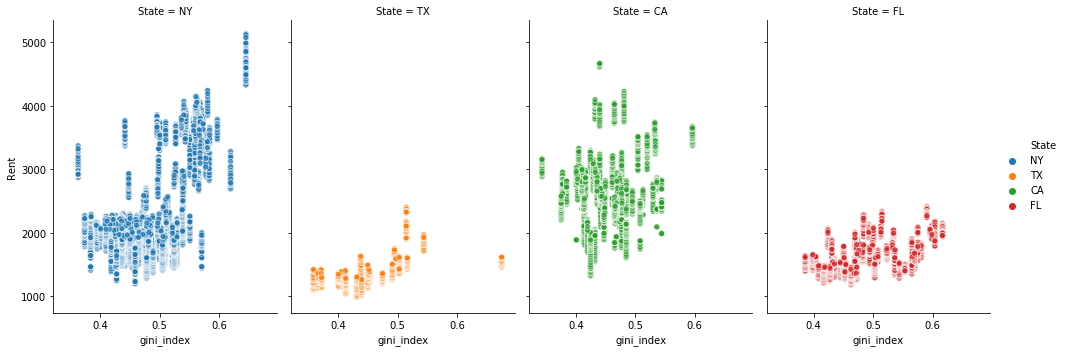

In [69]:
# scatterplot of avg commute time by rent
sns.relplot(data=zillow_full, x="gini_index", y="Rent", hue="State",col="State",aspect=.7,alpha=.7)

In [114]:
nydata = zillow_full[zillow_full['State']=='NY']

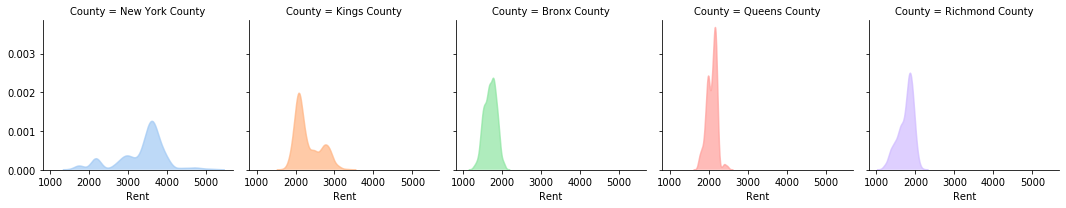

In [154]:
# density plot of the approx. housing availability
g = sns.FacetGrid(nydata, col="County",hue="County",palette="pastel")
g.map(sns.kdeplot, "Rent", alpha=.7,shade=True)

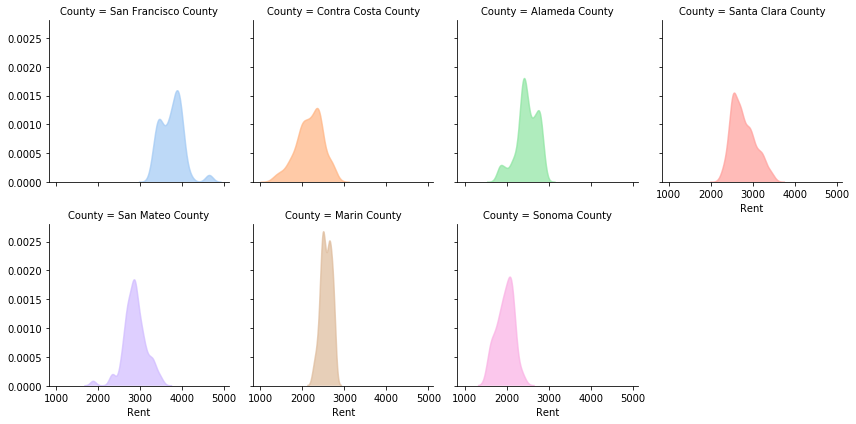

In [153]:
ca_data = zillow_full[zillow_full['State']=='CA']
# density plot of the approx. housing availability
g = sns.FacetGrid(ca_data, col="County",col_wrap=4,hue="County",palette="pastel")
g.map(sns.kdeplot, "Rent", alpha=.7,shade=True)

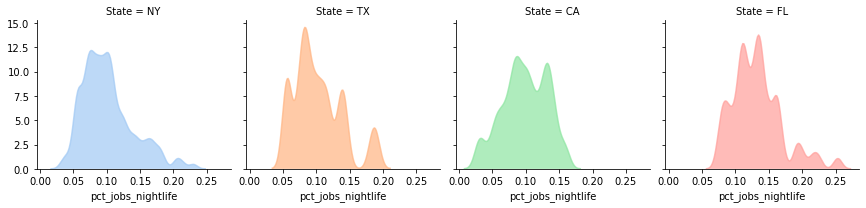

In [142]:
# density plot of the approx. housing availability
g = sns.FacetGrid(zillow_full, col="State",hue="State",palette="pastel")
g.map(sns.kdeplot, "pct_jobs_nightlife", alpha=.7,shade=True)